# Predicting Survivors from the Titanic Disaster
# Introduction
### At 11:40 on the night of April 14, 1912, Frederick Fleet cried "Iceberg, right ahead." As women and children were ushered into 20 lifeboats, Ida Straus, wife of co-owner, Macy's Department Store, gave her full-length mink coat to her personal maid who boarded a lifeboat. Ida Straus chose to die with her husband. The Titanic sank at 2:15 am. Over 1500 perished. Only approximately 705 passengers survived.

# The Titanic Dataset Analysis: 
# Summary of an insight ...
### Knowing that the Engish title "Master" was reserved for boys 18 years and younger gave me an idea.  Rather than filling in 20% of missing age data with the mean or median to figure out survivors, I decided to use the name variable instead. The name feature had no missing data.  Titles were stripped from names using Python Regular Expressons.  This is a superior method for predicting survivorship aboard the Titanic.


#### Using the Kaggle Titanic dataset,  a histogram was created of all passenger ages. It revealed a possible bimodal shape.  This suggested that there might be a demarcation of two groups, one for children and the other for adults. The titles Mr, Mrs, Miss, and Master were grouped for precision in predicting the survival onboard the Titanic.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)
%matplotlib inline


data = pd.read_csv("../EDA/titanic.csv")


In [2]:
#Creating 'Count' variable to assist with analysis
data['Count'] = 1

#Changing variable 'Sex' into binary quantitative form to aid analysis 
data['Sex'].replace({'male':0.0, 'female':1.0}, inplace = True)
    

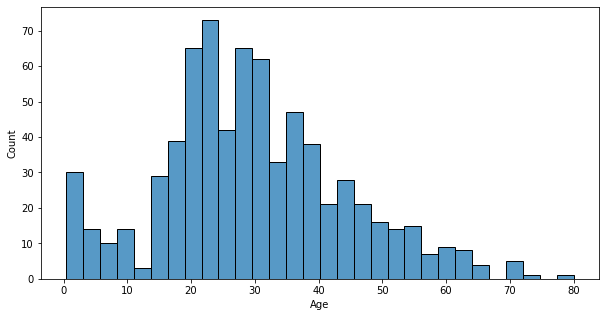

In [3]:
import seaborn as sns

#Configure the size
plt.figure(figsize=(10,5))
sns.histplot(data['Age'],bins=30);


#### Age has an impact on the survival rate. It is an important feature in the dataset.  The age variable is displayed by range(youngest in months and oldest of 80 years) and count of ages of all passengers given in the dataset.  

In [4]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

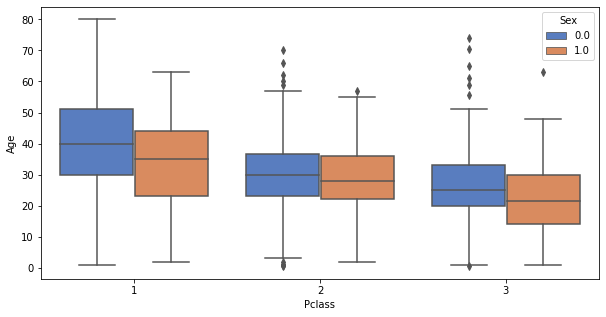

In [5]:
import seaborn as sns
#Configure the size
plt.figure(figsize=(10,5))

sns.boxplot(x='Pclass', y='Age', hue='Sex', data=data, palette='muted')


#### The box and whisker plot depicts the ages and sex variables per passenger class.  The diamond shaped outliers show ages above the 3rd quartile range(above 75% of the data) and below the 1st quartile range(below 25% of the data). The median age of men in 1st, 2nd, and 3rd class respectively is approximately 40, 30, and 23 years. The median age of women in 1st, 2nd, and 3rd class is approximately 34, 28, and 22 years.


##### The median age, sex, and class aren't precise enough to predict the survival rate. Extracting the title from the name feature uncovers all the titles and will highlight the exact number of male children. This can quickly be understood using the crosstab function.  Also it would not be obvious that there was one female Dr. married to another.

In [6]:
data['Title'] = data['Name'].str.extract(r'([A-Za-z]+)\.')


In [7]:
pd.crosstab(data['Title'], data['Sex'])

Sex,0.0,1.0
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


#### The Titles Mr and Master are very precise.  They were either over the age of 18 or under.  Miss was a title reserved for either an unmarried woman or a girl.
#### Because there are too many titles they will be filtered to the four we need: Mr, Mrs, Miss, and Master. We lose some precision with the imprecise definition of women.

In [8]:
data.loc[(data['Title'] == 'Dr') & (data['Sex'] == 1.0), 'Title'] = 'DrF'

In [9]:
#Filtering titles to Mr Mrs Miss Master 
data['Title'].replace({'Mr':'Mr', 'Mrs':'Mrs', 'Miss':'Miss', 'Master':'Master', 'Don':'Mr', 'Rev':'Mr', 'DrF':'Mrs', 'Dr':'Mr','Mme':'Mrs', 'Ms':'Miss', 'Major':'Mr', 'Lady':'Miss', 'Sir':'Mr', 'Mlle':'Miss', 'Col':'Mr', 'Capt':'Mr', 'Countess':'Mrs', 'Jonkheer':'Mr'}, inplace=True)


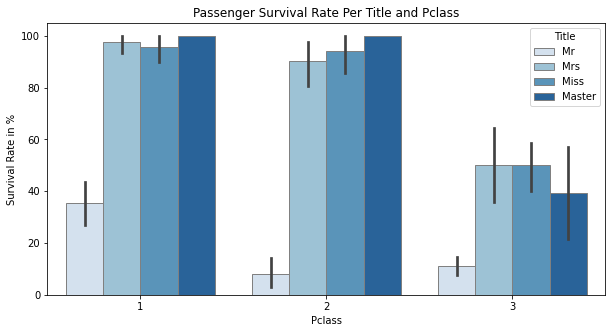

In [10]:
import seaborn as sns

#Configure the size
plt.figure(figsize=(10,5))
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Title', data = data, palette= 'Blues',edgecolor='Grey')
plt.xticks(range(0,3), ['1', '2', '3'])
plt.title('Passenger Survival Rate Per Title and Pclass')
plt.ylabel('Survival Rate in %')
plt.yticks(np.arange(0, 1.1, 0.2), range(0,101,20))


plt.show()


#### This visualization shows the survival rate in percentage of Mr Mrs Miss Master per class

#### Women and children indeed had a better chance of survival then men, regardless of class.
#### The survival rate, higher than 50%, are those that correspond to female (Miss or Mrs) or children (Master) titles.
